In [4]:
import scanpy as sc


In [5]:
data_path = "Visium_FFPE_Human_Prostate_Cancer_filtered_feature_bc_matrix_adenocarcinoma.h5"

adata = sc.read_10x_h5(data_path)


/home/rgr/anaconda3/envs/bioinfolab/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/rgr/anaconda3/envs/bioinfolab/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
adata.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
TSPY1,ENSG00000258992,Gene Expression,GRCh38
USP9Y,ENSG00000114374,Gene Expression,GRCh38
DDX3Y,ENSG00000067048,Gene Expression,GRCh38
TMSB4Y,ENSG00000154620,Gene Expression,GRCh38


In [7]:
adata.obs

""
AAACAAGTATCTCCCA-1
AAACACCAATAACTGC-1
AAACAGAGCGACTCCT-1
AAACAGCTTTCAGAAG-1
AAACAGGGTCTATATT-1
...
TTGTTGTGTGTCAAGA-1
TTGTTTCACATCCAGG-1
TTGTTTCATTAGTCTA-1
TTGTTTCCATACAACT-1


In [8]:
adata.var_names_make_unique()


In [9]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=10)

In [10]:
adata

AnnData object with n_obs × n_vars = 4371 × 15935
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [11]:
import numpy as np

# assume you've already loaded your data into `adata`
# and that .X is either a dense NumPy array or a sparse matrix

# 1. Check per‐cell total counts
cell_sums = np.asarray(adata.X.sum(axis=1)).flatten()
print(f"Per‐cell counts: min={cell_sums.min():.1f}, "
      f"median={np.median(cell_sums):.1f}, max={cell_sums.max():.1f}")


Per‐cell counts: min=206.0, median=10704.0, max=43095.0


In [12]:
data_vals = adata.X.data if hasattr(adata.X, 'data') else adata.X.flatten()
is_integer = np.allclose(data_vals, np.round(data_vals), atol=1e-8)
print("All entries integer?" , is_integer)

All entries integer? True


In [13]:
# 3. Check for log1p‐transform
#    If log1p was applied, expm1(X) should recover (approximately) the original counts.
from scipy import sparse
if sparse.issparse(adata.X):
    recovered = np.expm1(adata.X.data)
    is_log1p = np.allclose(recovered, np.round(recovered), atol=1e-6)
else:
    recovered = np.expm1(adata.X)
    is_log1p = np.allclose(recovered, np.round(recovered), atol=1e-6)
print("Likely log1p‐transformed?", is_log1p)

/tmp/ipykernel_13342/1773743579.py:5: RuntimeWarning: overflow encountered in expm1
  recovered = np.expm1(adata.X.data)


Likely log1p‐transformed? False


In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [15]:
adata

AnnData object with n_obs × n_vars = 4371 × 15935
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'log1p'

In [16]:
sc.tl.pca(adata, svd_solver='arpack')


In [17]:
!conda install -c conda-forge leidenalg -y

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
 - bioconda
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/rgr/anaconda3/envs/bioinfolab

  added / updated specs:
    - leidenalg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    openssl-3.5.0              |       h7b32b05_1         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following packages will be UPDATED:

  ca-certificates                      2025.4.26-hbd8a1cb_0 --> 2025.6.15-hbd8a1cb_0 
  certifi            pkgs/main/linux-64::certifi-2025.1.31~ --> conda-forge/noarch::certifi-2025.6.15-pyhd8ed1ab_0 
  op

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

/home/rgr/anaconda3/envs/bioinfolab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
sc.tl.leiden(adata, resolution=0.5)

/tmp/ipykernel_13342/1771924308.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


In [20]:
sc.tl.umap(adata)


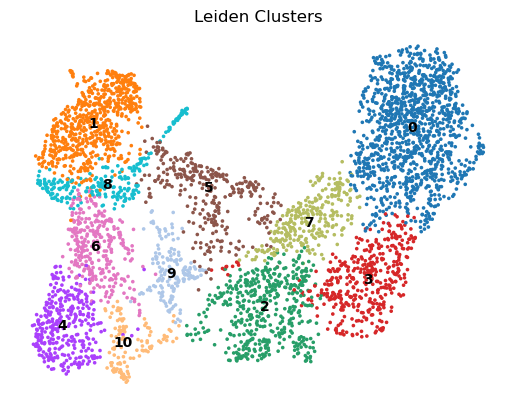

In [21]:
sc.pl.umap(adata, color='leiden', title='Leiden Clusters', legend_loc='on data', frameon=False)


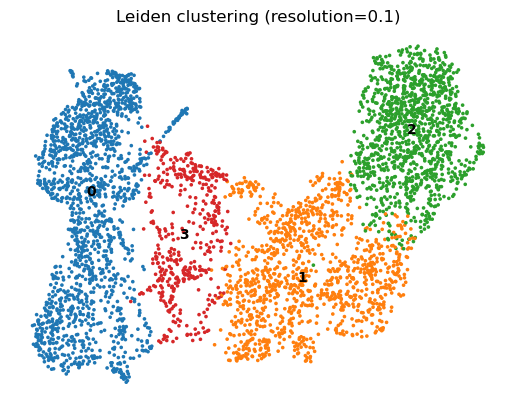

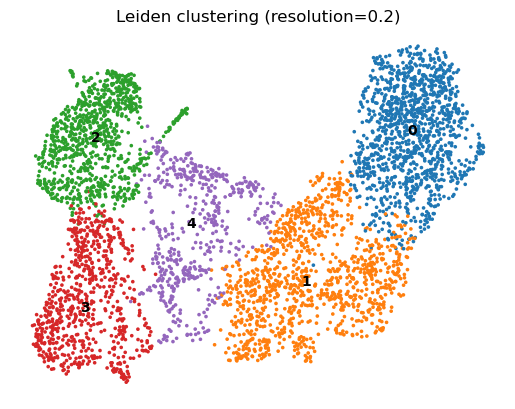

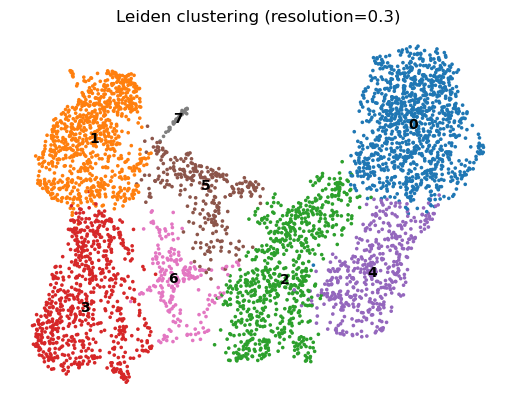

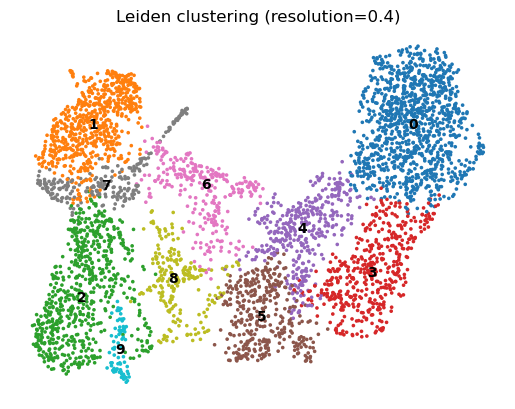

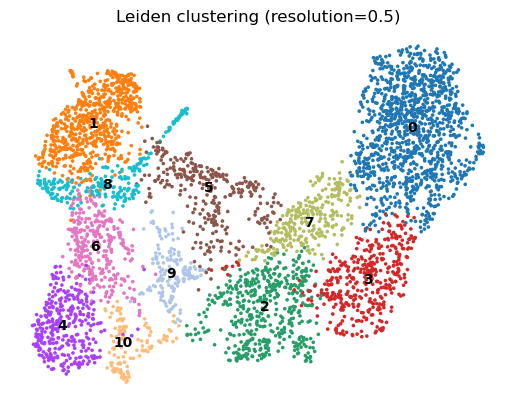

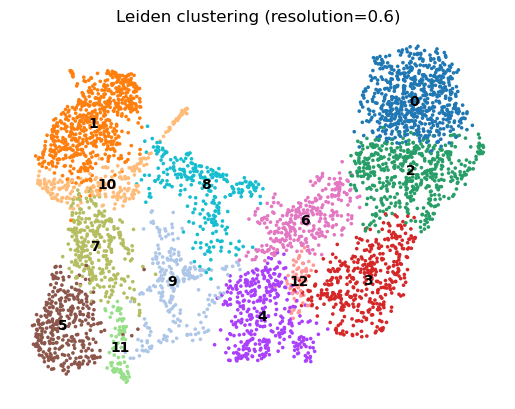

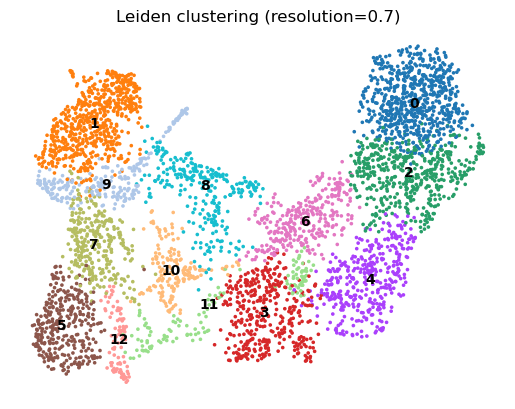

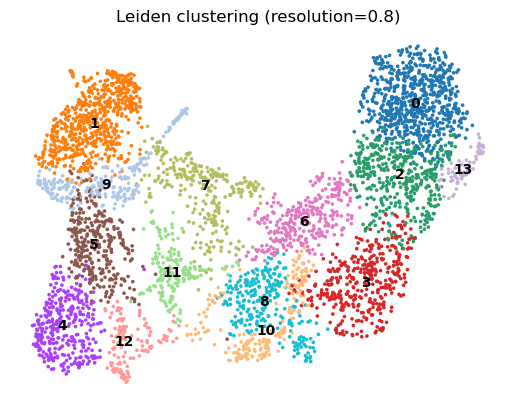

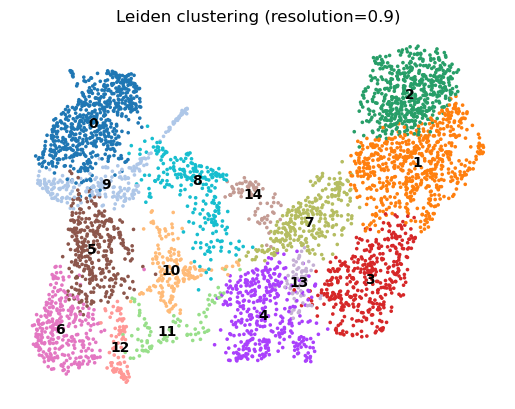

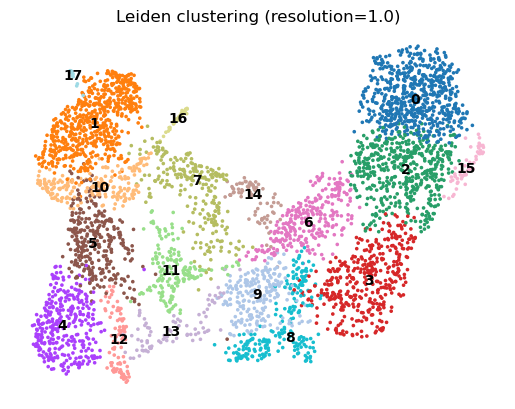

In [22]:

resolutions = np.round(np.arange(0.1, 1.01, 0.1), 1)

for res in resolutions:
    key = f'leiden_{res:.1f}'
    sc.tl.leiden(adata, resolution=res, key_added=key)
    
    sc.pl.umap(
        adata,
        color=key,
        title=f'Leiden clustering (resolution={res:.1f})',
        legend_loc='on data',
        frameon=False,
        show=True
    )